<a href="https://colab.research.google.com/github/pelinbalci/LLM_Notebooks/blob/main/visualizing_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Embeddings

Lecture notes from https://learn.deeplearning.ai/ short courses: Understanding and Applying Text Embeddings. In the lecture, Google Vertex.ai is used, however in this notebook we will use SentenceTransformers module from transformers library. All the other codes belong to deeplearning.ai

In [ ]:
!pip install -U sentence-transformers
!pip install mplcursors
!pip install ipympl

## Embeddings capture meaning

In [1]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!"


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

- Get embeddings for all pieces of text.
- Store them in a 2D NumPy array (one row for each embedding).

In [3]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('sentence-transformers/sentence-t5-base')

In [6]:
import numpy as np
embeddings = embedding_model.encode(input_text_lst_news)
embeddings_array = np.array(embeddings)

print(embeddings)
print(embeddings.shape)

[[-3.4393128e-02 -4.2635377e-02  1.5992187e-02 ... -3.4792889e-02
   4.9811257e-05 -3.4628152e-03]
 [-3.5974417e-02 -6.6899545e-03  1.1049665e-02 ... -2.3616400e-02
  -2.9121244e-02  2.9019887e-02]
 [-2.3479301e-02 -2.8344886e-02  7.8235986e-03 ... -3.2233872e-02
  -5.3652223e-02  1.8738842e-02]
 ...
 [ 2.8481305e-02 -7.5053032e-03  3.5565021e-04 ... -1.1997861e-02
  -1.1599870e-02  4.0815482e-03]
 [-3.0192899e-02 -3.8616765e-02  2.2596100e-02 ...  4.2400099e-02
  -9.7620441e-03  1.3117425e-02]
 [-3.7047863e-02 -1.6993860e-02  2.1476805e-02 ... -5.4557691e-03
  -3.9835181e-03  3.8810614e-02]]
(7, 768)


#### Reduce embeddings from 768 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization.

In [8]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [9]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.3321145  -0.08171833]
 [ 0.36061013 -0.02816105]
 [ 0.27511147 -0.03702987]
 [-0.15004244  0.38104805]
 [-0.1934284   0.2701631 ]
 [-0.29387504 -0.26638958]
 [-0.33049017 -0.23791224]]


In [15]:
def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()


In [24]:
from google.colab import output
output.enable_custom_widget_manager()

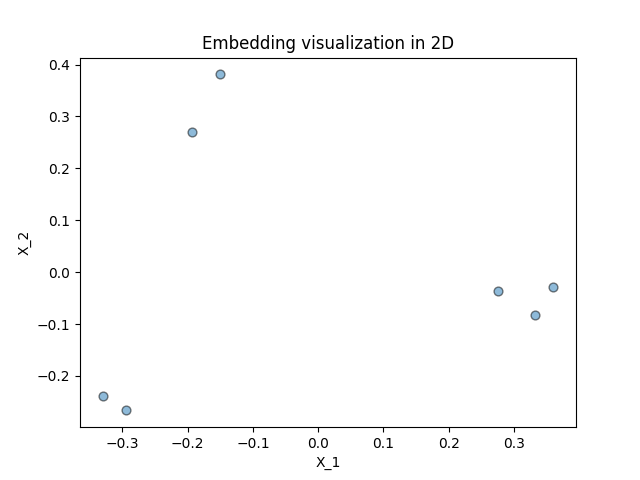

In [25]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

Support for third party widgets will remain active for the duration of the session. To disable support:

In [26]:
from google.colab import output
output.disable_custom_widget_manager()

#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [22]:
in_1 = """He couldn’t desert
          his post at the power plant."""

in_2 = """The power plant needed
          him at the time."""

in_3 = """Cacti are able to
          withstand dry environments."""

in_4 = """Desert plants can
          survive droughts."""

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [27]:
embeddings = embedding_model.encode(input_text_lst_sim)
embeddings_array = np.array(embeddings)

print(embeddings)
print(embeddings.shape)

[[-0.0366668  -0.01718968  0.00652206 ... -0.00476387 -0.02559084
  -0.00143759]
 [-0.04032458 -0.03566436 -0.01300528 ... -0.01244713 -0.00806841
   0.00564099]
 [-0.02074978 -0.01339219  0.01233903 ...  0.03515669 -0.02015977
   0.01576264]
 [-0.01566688  0.00348323  0.02236002 ...  0.04738779 -0.02878965
   0.01385143]]
(4, 768)


In [29]:

def plot_heatmap(data, x_labels=None, y_labels=None, title=None):
    fig, ax = plt.subplots(figsize=(50, 3))
    heatmap = ax.pcolor(data, cmap='coolwarm', edgecolors='k', linewidths=0.1)

    # Add color bar to the right of the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.remove()

    # Set labels for each axis
    if x_labels:
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
    if y_labels:
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
        ax.set_yticklabels(y_labels, va="center")

    # Set title
    if title:
        ax.set_title(title)

    plt.tight_layout()

    # Show the plot
    plt.show()

In [31]:
from google.colab import output
output.enable_custom_widget_manager()

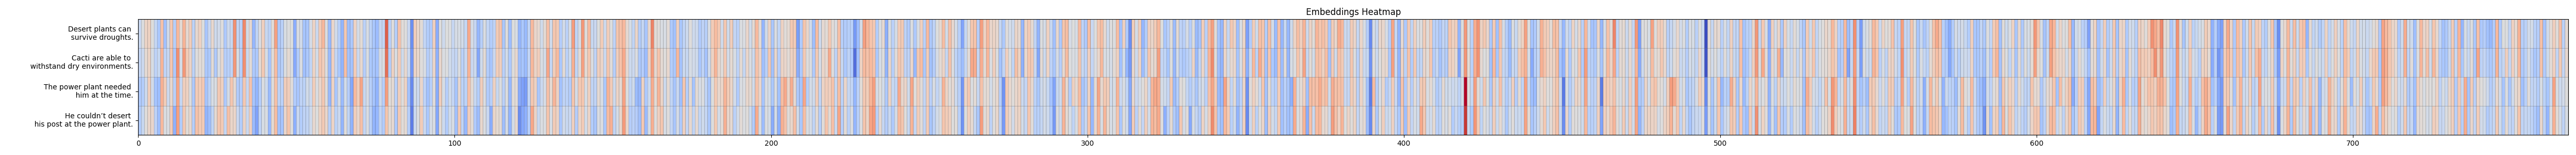

In [32]:
y_labels = input_text_lst_sim

# Plot the heatmap
plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

In [33]:
from google.colab import output
output.disable_custom_widget_manager()

Note: the heat map won't show everything because there are 768 columns to show.  To adjust the heat map with your mouse:
- Hover your mouse over the heat map.  Buttons will appear on the left of the heatmap.  Click on the button that has a vertical and horizontal double arrow (they look like axes).
- Left click and drag to move the heat map left and right.
- Right click and drag up to zoom in.
- Right click and drag down to zoom out.

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [36]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

He couldn’t desert 
          his post at the power plant.
The power plant needed 
          him at the time.
[[0.89737403]]


In [37]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

He couldn’t desert 
          his post at the power plant.
Desert plants can 
          survive droughts.
[[0.73681474]]
